<a href="https://colab.research.google.com/github/ruyku/New-York-Airbnb-/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [ ]:
%%HTML 
<script>
    function luc21893_refresh_cell(cell) {
        if( cell.luc21893 ) return;
        cell.luc21893 = true;
        console.debug('New code cell found...' );
        
        var div = document.createElement('DIV');            
        cell.parentNode.insertBefore( div, cell.nextSibling );
        div.style.textAlign = 'right';
        var a = document.createElement('A');
        div.appendChild(a);
        a.href='#'
        a.luc21893 = cell;
        a.setAttribute( 'onclick', "luc21893_toggle(this); return false;" );

        cell.style.visibility='hidden';
        cell.style.position='absolute';
        a.innerHTML = '[show code]';        
                
    }
    function luc21893_refresh() {                
        if( document.querySelector('.code_cell .input') == null ) {            
            // it apeears that I am in a exported html
            // hide this code
            var codeCells = document.querySelectorAll('.jp-InputArea')
            codeCells[0].style.visibility = 'hidden';
            codeCells[0].style.position = 'absolute';                        
            for( var i = 1; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i].parentNode)
            }
            window.onload = luc21893_refresh;
        }                 
        else {
            // it apperas that I am in a jupyter editor
            var codeCells = document.querySelectorAll('.code_cell .input')
            for( var i = 0; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i])
            }            
            window.setTimeout( luc21893_refresh, 1000 )
        }        
    }
    
    function luc21893_toggle(a) {
        if( a.luc21893.style.visibility=='hidden' ) {
            a.luc21893.style.visibility='visible';        
            a.luc21893.style.position='';
            a.innerHTML = '[hide code]';
        }
        else {
            a.luc21893.style.visibility='hidden';        
            a.luc21893.style.position='absolute';
            a.innerHTML = '[show code]';
        }
    }
    
    luc21893_refresh()
</script>

In [ ]:
df = pd.read_csv('/content/Train.csv')

ID: ID Number of Customers.

Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.

Weight in gms: It is the weight in grams.

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.shape

(10999, 12)

In [ ]:
#Create pie chart

def create_pie(data) :
    plt.figure(figsize=(8, 5))
    explode = (0.05,0.05,0.05,0.05)
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    data.plot.pie(fontsize=17, autopct='%1.0f%%', shadow=True, startangle=90, colors = colors,pctdistance=0.85)
    
     
    
    

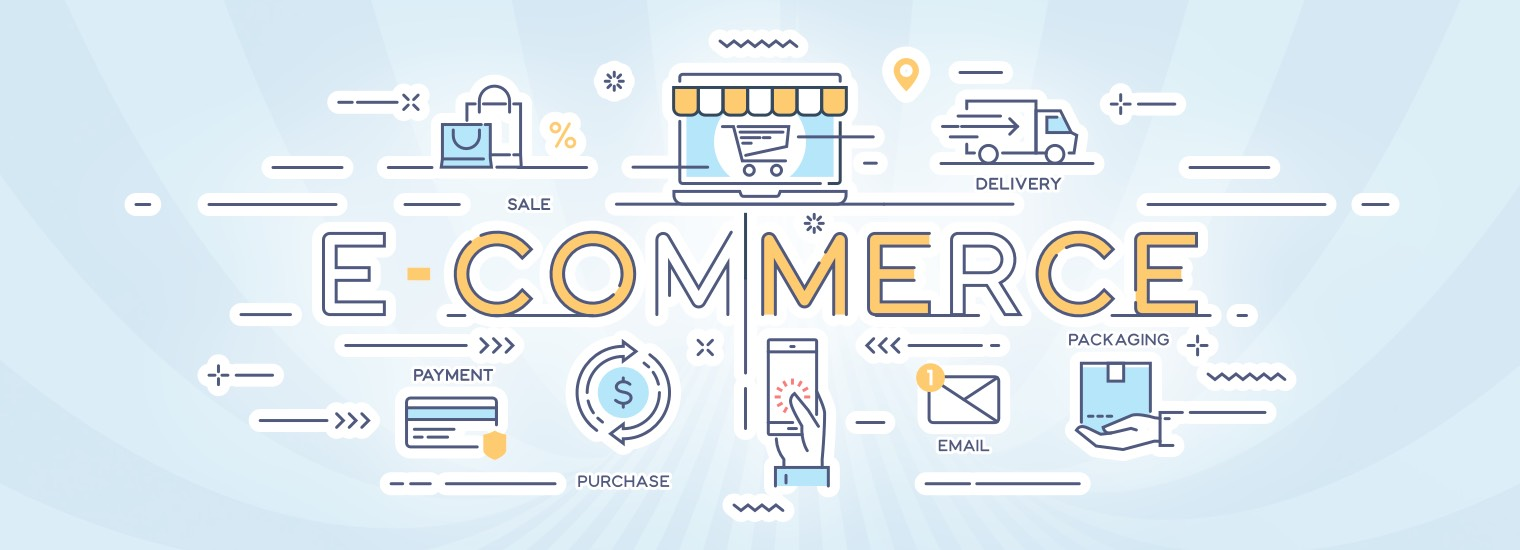


**E-Commerce Shipping Data            
By Darren Zhao**

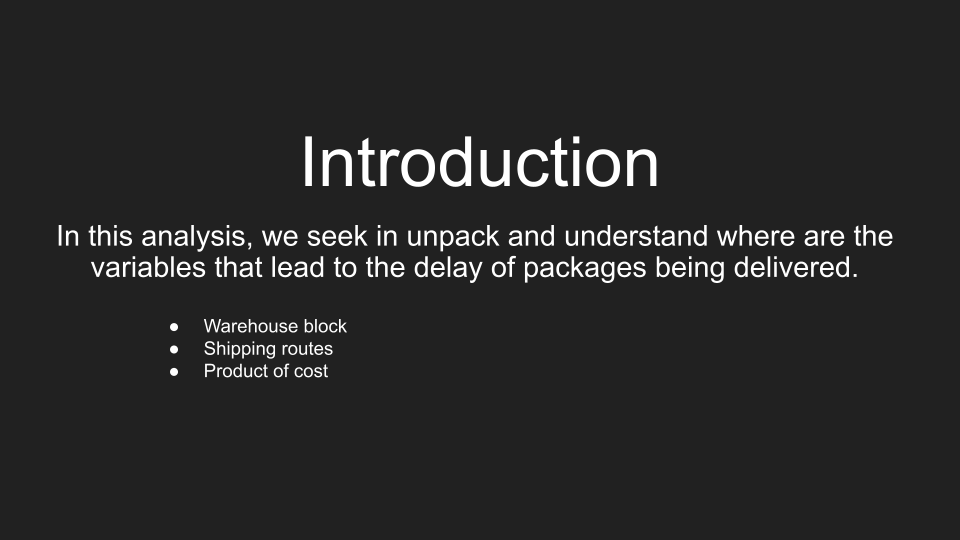

Text(0.5, 1.0, 'Warehouse block with count of products')

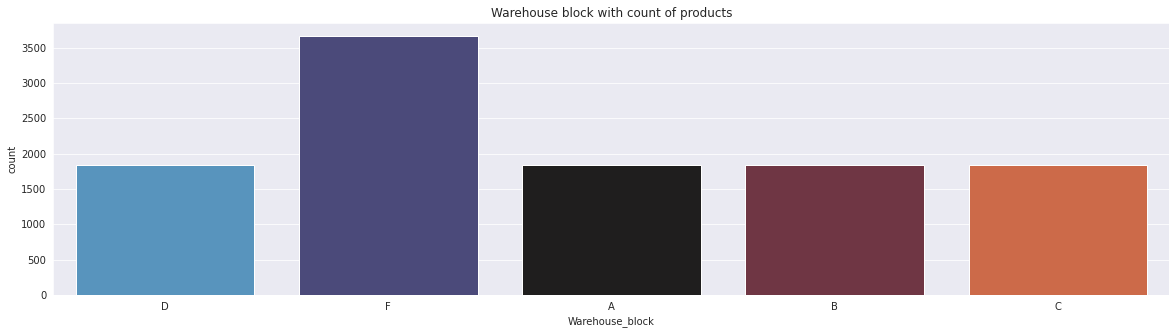

In [ ]:
sns.countplot(x='Warehouse_block',data=df,palette = "icefire")
plt.title("Warehouse block with count of products")

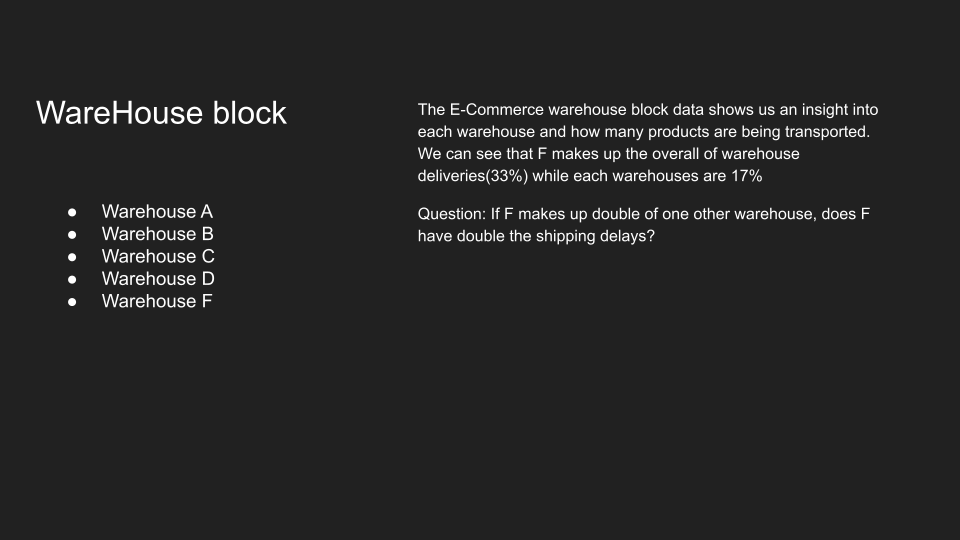

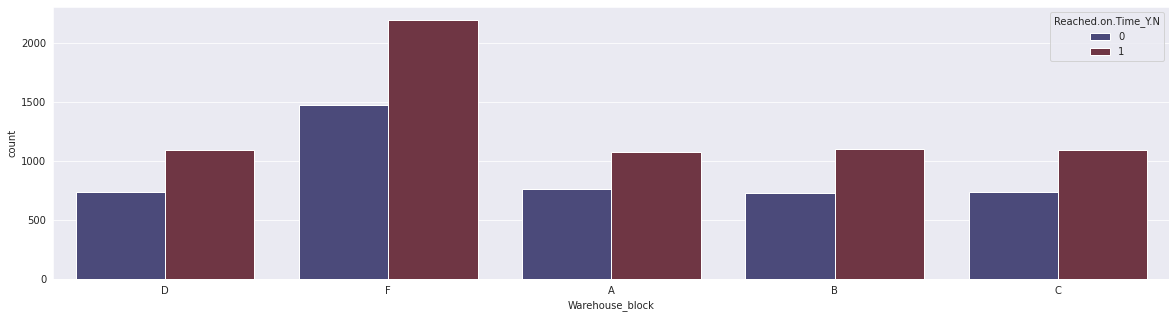

In [ ]:
sns.countplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=df,palette = "icefire") 

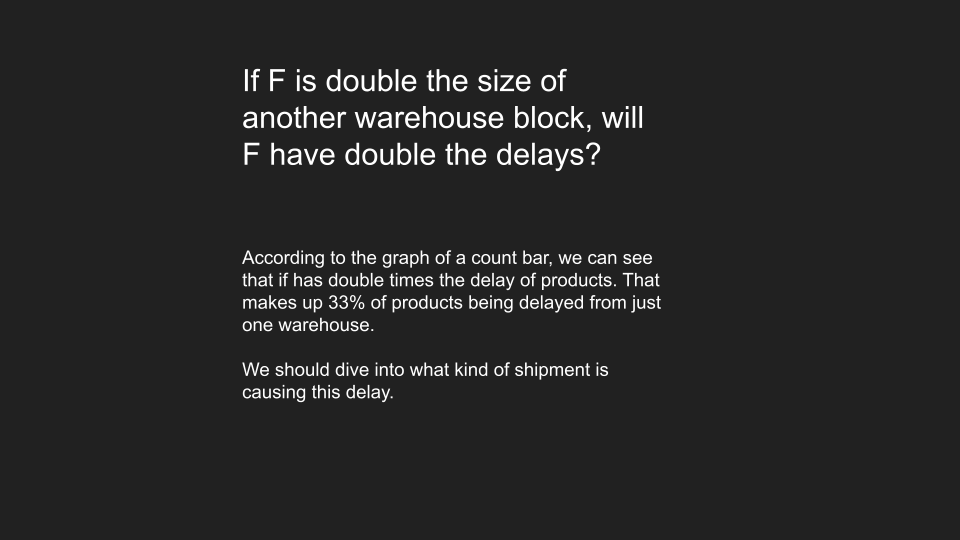

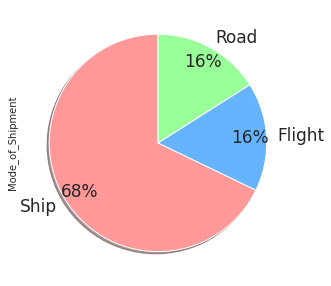

In [ ]:
shipping_mode = df['Mode_of_Shipment'].value_counts()
create_pie(shipping_mode)

In [ ]:
df[["Mode_of_Shipment", "Warehouse_block","Reached.on.Time_Y.N"]].groupby(["Mode_of_Shipment", "Reached.on.Time_Y.N"]).count()

Warehouse_block
Mode_of_Shipment Reached.on.Time_Y.N                 
Flight           0                                708
                 1                               1069
Road             0                                725
                 1                               1035
Ship             0                               3003
                 1                               4459

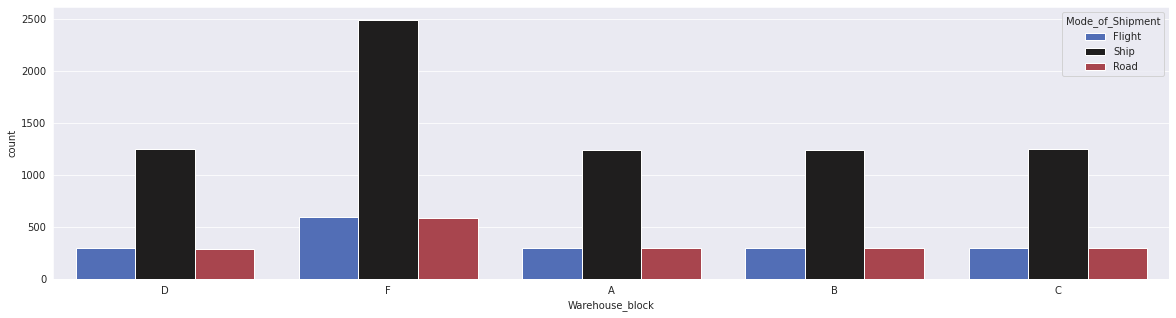

In [ ]:
sns.countplot(x='Warehouse_block', hue='Mode_of_Shipment', data=df, palette ="icefire")

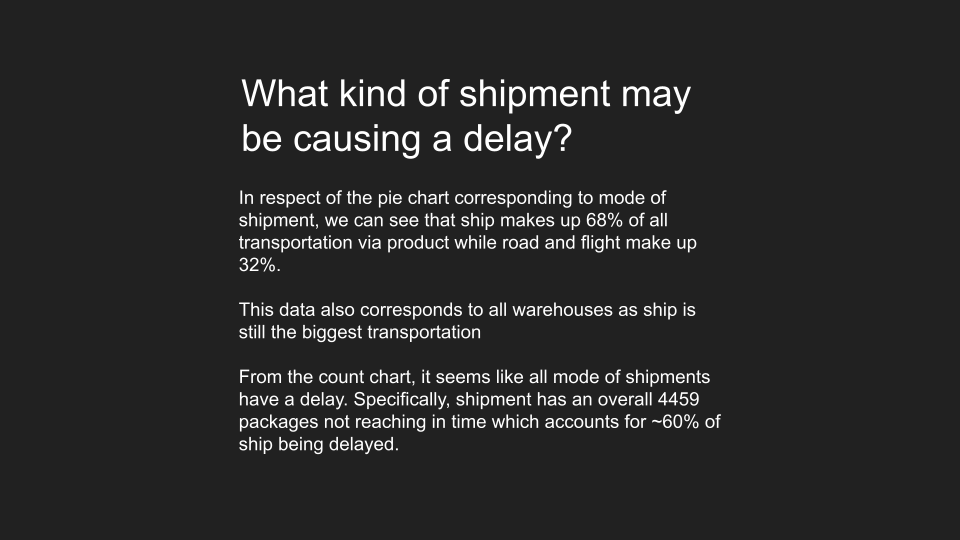

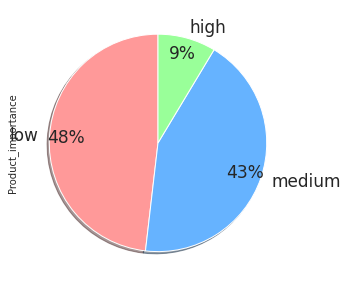

In [ ]:
Importance  = df['Product_importance'].value_counts()
create_pie(Importance)

In [ ]:
df[["Product_importance", "Warehouse_block","Reached.on.Time_Y.N"]].groupby(["Product_importance", "Reached.on.Time_Y.N"]).count()

Warehouse_block
Product_importance Reached.on.Time_Y.N                 
high               0                                332
                   1                                616
low                0                               2157
                   1                               3140
medium             0                               1947
                   1                               2807

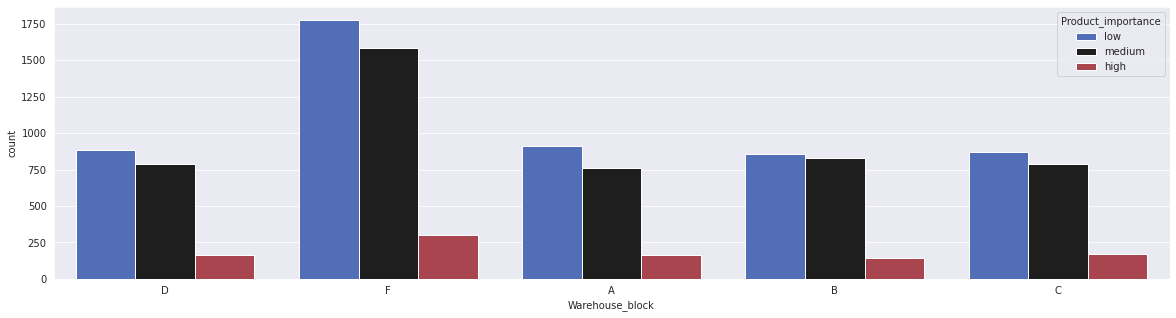

In [ ]:
sns.countplot(x='Warehouse_block', hue='Product_importance', data=df, palette ="icefire")

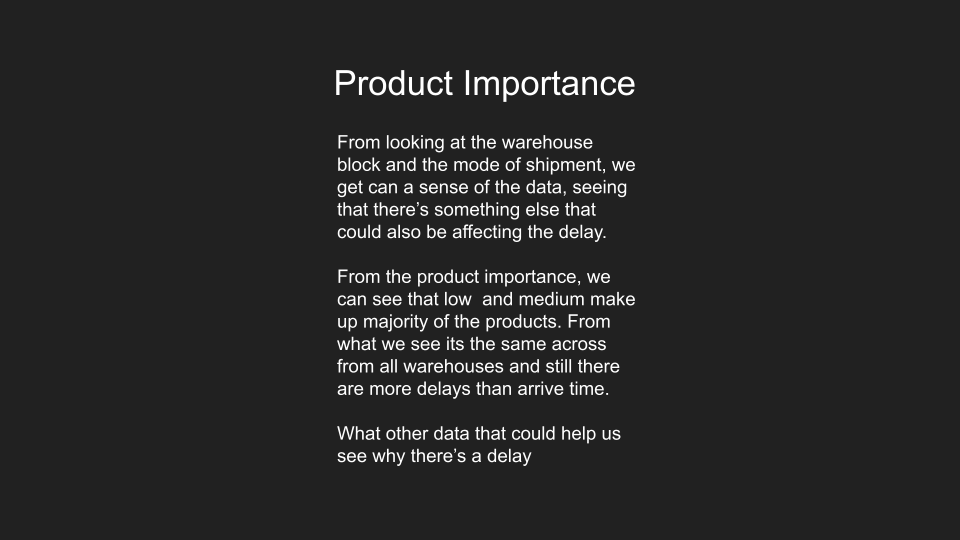

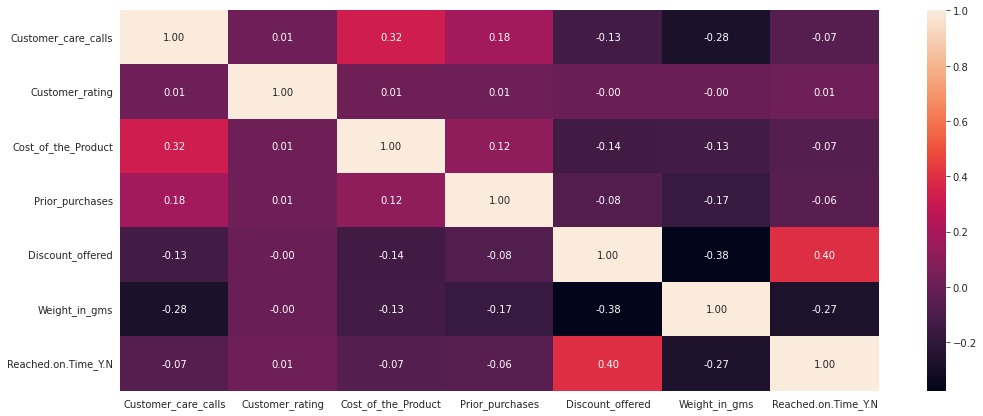

In [ ]:
heat_list = ["Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms","Reached.on.Time_Y.N"]

plt.figure(figsize = (17,7))
sns.heatmap(df[heat_list].corr(), annot = True, fmt = ".2f")
plt.show()

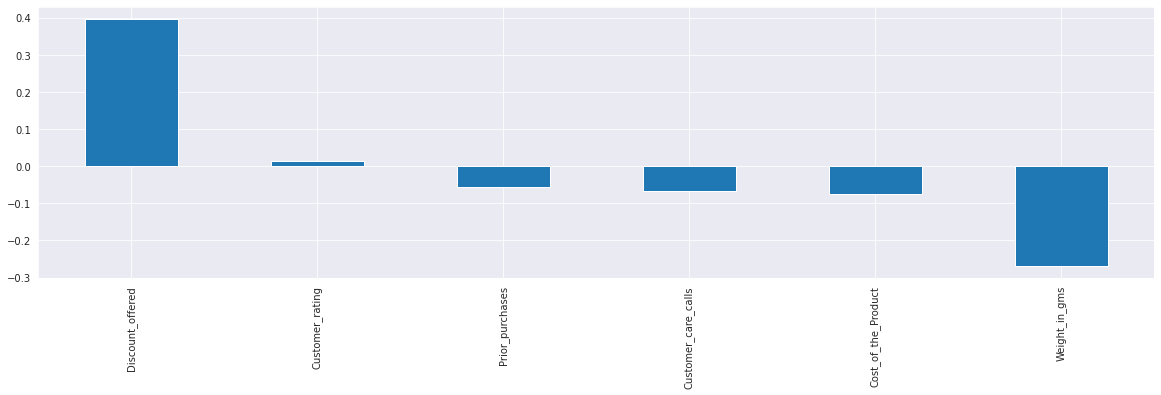

In [ ]:
df[heat_list].corr()["Reached.on.Time_Y.N"].sort_values(ascending = False)[1:].plot(kind = "bar")

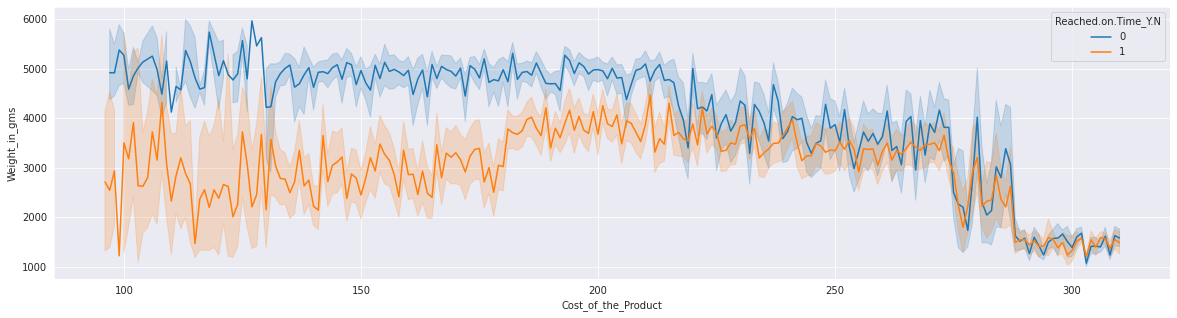

In [ ]:
sns.lineplot(data =df, x = 'Cost_of_the_Product',y = 'Weight_in_gms', hue = 'Reached.on.Time_Y.N')

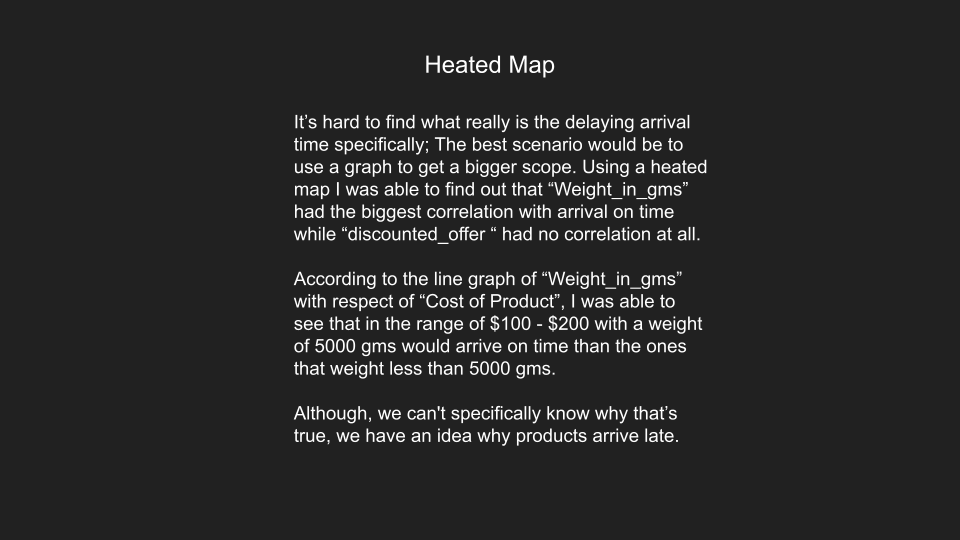

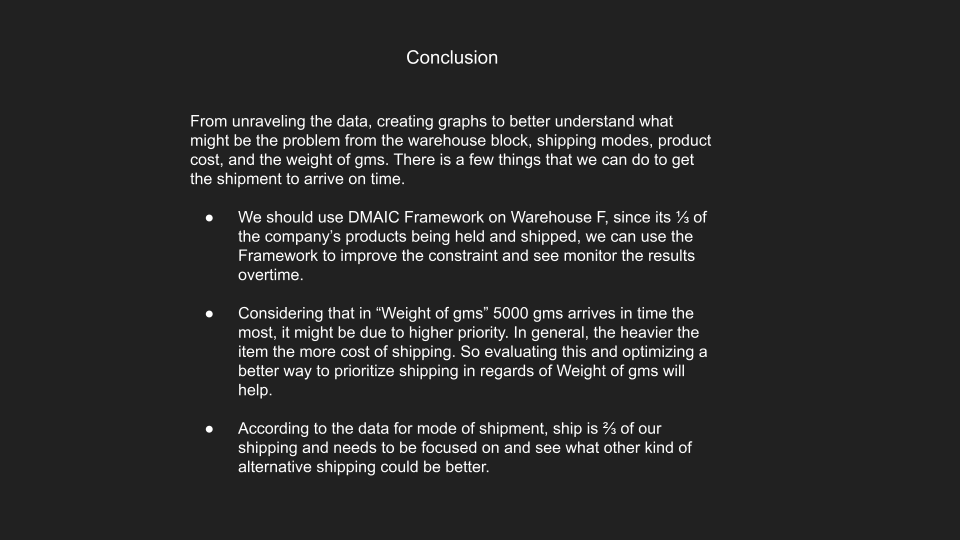